In [40]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [41]:
def readCSVFile(filePath):
    file = open(filePath)
    read_csv = csv.reader(file)
    next(read_csv)
    rows = []
    for row in read_csv:
        rows.append(row)
        row.pop(0)
    return rows

rows = readCSVFile(r"C:\\Users\\Xiaomi\\Desktop\\ml_lab_1\\lab_1_test.csv")
xColumn = [float(row[0]) for row in rows]
yColumn = [float(row[1]) for row in rows]

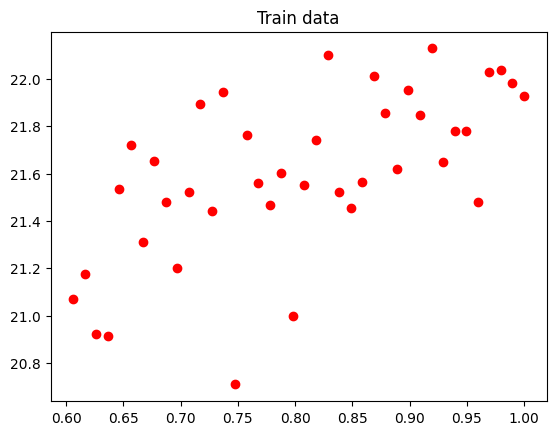

In [42]:
plt.title("Train data")
plt.plot(xColumn, yColumn, 'ro')

In [43]:
tolerance = 0.000001
learningRate = 0.01

def line_regres(b0, b1, x):
    return b0 + np.multiply(b1, x)

def loss_info(predict, actual):
    result = 0
    for i in range(0, len(predict)):
        result += (predict[i] - actual[i]) ** 2
    return result / len(predict)

def train(rows):
    beta0 = float(np.random.randn(1))
    beta1 = float(np.random.randn(1))
    xColumn = []
    yColumn = []

    for row in rows:
        xColumn.append(float(row[0]))
        yColumn.append(float(row[1]))
    predict_y = []

    for x in xColumn:
        predict_y.append(line_regres(beta0, beta1, x))
    loss = loss_info(predict_y, yColumn)
    delta = 100
    epochNumber = 0

    while tolerance < delta:
        predict_y = []

        for x in xColumn:
            predict_y.append(line_regres(beta0, beta1, x))
        diff_value = [(expected - predicted) for (expected, predicted) in zip(yColumn, predict_y)]
        derivat_b0 = - (2 / len(diff_value)) * np.sum(diff_value)
        sum = 0

        for (xValue, yDiff) in zip(xColumn, diff_value):
            sum += xValue * yDiff
        derivat_b1 = - (2 / len(diff_value)) * sum
        beta0 = beta0 - learningRate * derivat_b0
        beta1 = beta1 - learningRate * derivat_b1
        predict_y = []

        for x in xColumn:
            predict_y.append(line_regres(beta0, beta1, x))
        cur_loss = loss_info(predict_y, yColumn)
        delta = loss - cur_loss
        loss = cur_loss
        print("Epoch %s: beta0 = %s; beta1 = %s; Loss function value = %s;" % (epochNumber, beta0, beta1, cur_loss))
        epochNumber += 1

    return {
        "beta0" : beta0,
        "beta1" : beta1
    }

beta_obj = train(rows)
beta_obj

Epoch 0: beta0 = -1.2777769737353588; beta1 = 1.5197874044120863; Loss function value = 469.01857396005306;
Epoch 1: beta0 = -0.8446747345508501; beta1 = 1.8676766304769257; Loss function value = 438.66738347634157;
Epoch 2: beta0 = -0.4258218519625879; beta1 = 2.204028596478688; Loss function value = 410.2865405544063;
Epoch 3: beta0 = -0.02074804344975567; beta1 = 2.529224090640835; Loss function value = 383.74813162129635;
Epoch 4: beta0 = 0.3710014521683975; beta1 = 2.8436313335398955; Loss function value = 358.93254716357796;
Epoch 5: beta0 = 0.7498663870033846; beta1 = 3.147606392891743; Loss function value = 335.72794263360936;
Epoch 6: beta0 = 1.1162719994611725; beta1 = 3.441493584648149; Loss function value = 314.0297343534033;
Epoch 7: beta0 = 1.4706294932567472; beta1 = 3.7256258608554296; Loss function value = 293.74012814405694;
Epoch 8: beta0 = 1.813336500619142; beta1 = 4.000325184712089; Loss function value = 274.7676785562295;
Epoch 9: beta0 = 2.1447775302087124; beta

{'beta0': 19.71492578838451, 'beta1': 2.340756894175278}

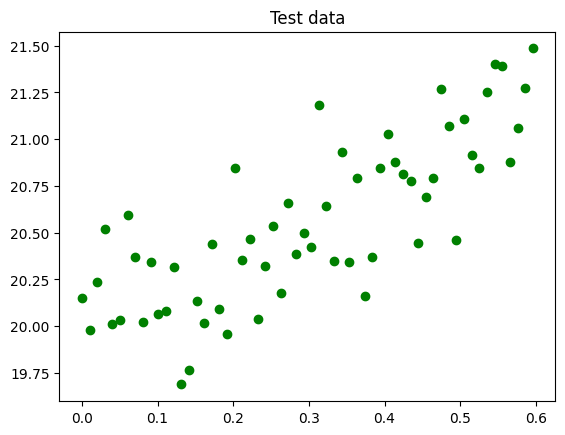

In [44]:
testRows = readCSVFile(r"C:\\Users\\Xiaomi\\Desktop\\ml_lab_1\\lab_1_train.csv")
test_x = [float(row[0]) for row in testRows]
test_y = [float(row[1]) for row in testRows]
plt.title("Test data")
plt.plot(test_x, test_y,'go')

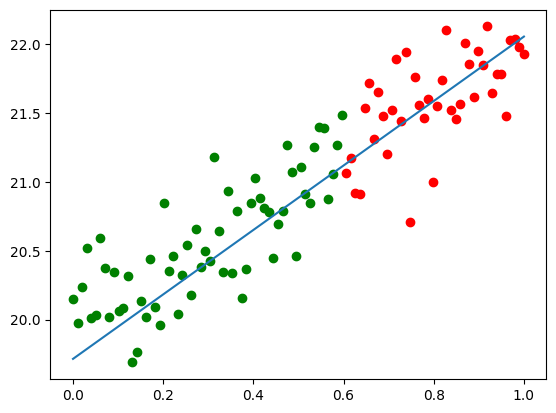

In [45]:
plt.plot(xColumn, yColumn, 'ro',
         test_x, test_y, 'go',
         [0, 1], [line_regres(beta_obj["beta0"], beta_obj["beta1"], 0), line_regres(beta_obj["beta0"], beta_obj["beta1"], 1)])

In [46]:
predict_y = []
for x in test_x:
    predict_y.append(line_regres(beta_obj["beta0"], beta_obj["beta1"], x))

loss = loss_info(predict_y, test_y)
loss

0.09585161636420936